In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Currently data is in directories like

In [3]:
# Try a new CNN with the input data augmented so it will classify obscured spheres
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

#########################################################
# With this the whole file structure had to be changed.
# TODO Use code for test train split, currently the last 10 or so files are used as test, not randomly
#   For test/train split
#       get list of positives and negatives, test/train split the list.
#       move all filenames in that list to either test, or train directory
#########################################################

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# This code just makes a few examples of the augmented image, good for my understanding but can be commented out.

'''
datagen = ImageDataGenerator(
        #rescale=1./255,
        width_shift_range=0.0,
        height_shift_range=0.0, # From 0.2 to 0 ONLY MIDDLE
        shear_range=0.2,
        zoom_range=[1,4],       # Changed to zoom out 5 -> 4 was too good
        horizontal_flip=True)

img = load_img('TrainingImages/positives/positivePatch_304.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (51, 51, 3)
x = x.reshape((1,) + x.shape)  # np array with shape (1, 51, 51, 3)

# Save example images if you want to see whats happening inside
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='TrainingImages', save_prefix='augmented', save_format='jpg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely
'''

Using TensorFlow backend.


"\ndatagen = ImageDataGenerator(\n        #rescale=1./255,\n        width_shift_range=0.0,\n        height_shift_range=0.0, # From 0.2 to 0 ONLY MIDDLE\n        shear_range=0.2,\n        zoom_range=[1,4],       # Changed to zoom out 5 -> 4 was too good\n        horizontal_flip=True)\n\nimg = load_img('TrainingImages/positives/positivePatch_304.jpg')  # this is a PIL image\nx = img_to_array(img)  # this is a Numpy array with shape (51, 51, 3)\nx = x.reshape((1,) + x.shape)  # np array with shape (1, 51, 51, 3)\n\n# Save example images if you want to see whats happening inside\ni = 0\nfor batch in datagen.flow(x, batch_size=1, save_to_dir='TrainingImages', save_prefix='augmented', save_format='jpg'):\n    i += 1\n    if i > 20:\n        break  # otherwise the generator would loop indefinitely\n"

In [5]:
'''
batch_size = 16 # TODO find out what batch_size is

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=0.0,
        height_shift_range=0.0, # From 0.2 to 0 ONLY MIDDLE
        shear_range=0.2,
        zoom_range=[1,4],       # Changed to zoom out 5 -> 4 was too good
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'TrainingImages/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'TrainingImages/train',  # this is the target directory
        target_size=(51, 51),  # all images will be resized to 51x51
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'TrainingImages/test',
        target_size=(51, 51),
        batch_size=batch_size,
        class_mode='binary')

# TODO search more about these hyperparameters
# steps_per_epoch???? 

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5,       # Can Increase later but I dont think more epochs really help it
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save('CNN_Model.h5')
'''

Found 2830 images belonging to 2 classes.
Found 95 images belonging to 2 classes.
Epoch 1/5
125/125 [==============================] - 17s 137ms/step - loss: 0.0839 - accuracy: 0.9765 - val_loss: 0.0054 - val_accuracy: 0.9596
Epoch 2/5
125/125 [==============================] - 25s 201ms/step - loss: 0.0190 - accuracy: 0.9980 - val_loss: 0.1441 - val_accuracy: 0.9558
Epoch 3/5
125/125 [==============================] - 22s 174ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 3.9111e-06 - val_accuracy: 1.0000
Epoch 4/5
125/125 [==============================] - 25s 203ms/step - loss: 1.3366e-04 - accuracy: 1.0000 - val_loss: 0.3348 - val_accuracy: 0.9470
Epoch 5/5
125/125 [==============================] - 27s 215ms/step - loss: 7.7875e-04 - accuracy: 0.9995 - val_loss: 0.6500 - val_accuracy: 0.9482


In [6]:
# Load model
from tensorflow import keras

model = keras.models.load_model('CNN_Model.h5')

# Classifier is trained
Now the classifier has been sufficiently trained we can use it on the pacman data

1 - First I will define the functions I created for the task

2 - Then I will use the PacMan code to play the game 

In [7]:

############### OLD BUT KEPT FOR REFERENCE #####################
# Define function sliding window
# returns array of windows that I can classify at once
def sliding_window( step_size, image ):
    #image is (160, 240, 3)
    #window is (51, 51, 3)
    image_hight = image.shape[0] # 160
    image_width = image.shape[1] # 240
    window_size = 51
    windows = []

    for y in range(0, image_hight-window_size, step_size):   # Verticle
        for x in range (0, image_width-window_size, step_size):   #horizontal
            windows.append(image[y:y+window_size, x:x+window_size, :])
    print('Number of windows: {}'.format(len(windows)))

    return np.array(windows) # Return windows as np array

# This function is an extention of the sliding_window function
# The function takes in
# Prints 
# Returns the x,y coordinates of all the possible spheres ?????  
def sliding_window_classifier( step_size, image ):
    #image is (160, 240, 3)
    #window is (51, 51, 3)
    image_hight = image.shape[0] # 160
    image_width = image.shape[1] # 240
    window_size = 51
    windows = []    # Dont do anything with windows ?
    result = []

    for y in range(0, image_hight-window_size, step_size): 
        for x in range (0, image_width-window_size, step_size):

            window = image[y:y+window_size, x:x+window_size, :]

            #Normaly you predict on an array of value, but here we want the (x,y) coordinates and this is easier
            window = np.expand_dims(window, axis=0) # Adds first dimension to data (1,51,51,3) -> (1,51,51,3) # MIGHT get not np error
            prediction = model.predict( np.array( window ) )
            prediction = prediction[0][0] #  Unpack prediction [[1.]] -> 1

            if (prediction > 0.3):
                # SECTION FOR DEBUGGING PURPOSES
                #print('Coordinates: X:{}, Y:{}'.format(x,y))
                print('Prediction percentage: {} \n'.format(prediction))   #
                print('Middle pixel Depth: {}'.format(depth[y+26, x+26]))   # TODO call depth as a parameter or ensure it is correct
                # Find depth look at the middle

                # 26 IS MIDDLE PIXEL
                #TODO Draw a rectangle over these                 
                print('Middle 4:')
                print(depth[ y+25:y+27, x+25:x+27 ])    # IS THIS IN THE MIDDLE OR OF TO THE SIDE
                                                        # GET MIN/MODE OF THIS
                print('Middle 8:')
                print(depth[ y+24:y+28, x+24:x+28 ])    # IS THIS IN THE MIDDLE OR OF TO THE SIDE
                                                        # GET MIN/MODE OF THIS
                plt.figure(figsize=(8,4))
                plt.title('Image')
                plt.imshow( window[0,:,:,:] )   
                from matplotlib.patches import Rectangle
                ax=plt.gca()    # gca=get_current_axes?
 

                # Middle 4      1x1 either side
                ax.add_patch(Rectangle((24,24), width=2, height=2,linewidth=1,edgecolor='g',facecolor='none'))  
                # Middle 16     2x2 either side
                ax.add_patch(Rectangle((23,23), width=4, height=4,linewidth=1,edgecolor='y',facecolor='none')) 
                # Middle 36     3x3 either side
                ax.add_patch(Rectangle((22,22), width=6, height=6,linewidth=1,edgecolor='g',facecolor='none'))
                # Middle 64     4x4 either side
                ax.add_patch(Rectangle((21,21), width=8, height=8,linewidth=1,edgecolor='y',facecolor='none'))  

                ax.spines['left'].set_position('center')
                ax.spines['bottom'].set_position('center')
                #ax.xaxis.set_ticks([])
                #ax.yaxis.set_ticks([])  # Remove ticks
                ax.xaxis.set_ticks_position('bottom')
                ax.yaxis.set_ticks_position('left')
                plt.show()

                plt.figure(figsize=(4,2))
                plt.title('Depth')
                plt.imshow( depth[y:y+51, x:x+51] )    
                plt.colorbar()
                plt.show()
                print('########################################')
                print()
                # SECTION FOR DEBUGGING PURPOSES

                middle_depth = depth[y+25, x+25]

                if (prediction > 0.99): # Need to be at least 99% to add to list
                    result.append( (x, y, prediction, middle_depth) )
                    #return (x,y)    # WILL ONLY PRINT FIRST ONE TODO PRINT VECTOR OF x,y s

    # Results are np array with columns: X, Y, Prediction
    return np.asarray(result)#np.concatenate(result).reshape(-1,4)    # If len(coordinates)==0 then no spheres were found
# TODO WITH ABOVE MOVE TO HIGHEST PREDICITION, THEN CLOSEST BALL
# Maybe use pandas for that too

# Not for task but function to nicely visualise allmaps
def visualise_maps(image, mapx, mapy, mapz, depth):
    # Inputs can be full 160x240 or 51x51 in size
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,3))

    ax[0].set_title('image')
    im0 = ax[0].imshow(image)
    #fig.colorbar(im, ax=ax[0])

    ax[1].set_title('mapx')
    im1 = ax[1].imshow(mapx, cmap='bwr')
    fig.colorbar(im1, ax=ax[1])

    ax[2].set_title('mapy')
    im2 = ax[2].imshow(mapy, cmap='bwr')
    fig.colorbar(im2, ax=ax[2])

    ax[3].set_title('mapz')
    im3 = ax[3].imshow(mapz, cmap='bwr')
    fig.colorbar(im3, ax=ax[3])

    ax[4].set_title('depth')
    im4 = ax[4].imshow(depth, cmap='bwr')
    fig.colorbar(im4, ax=ax[4])
    plt.show()
    print()


# This will change a lot
# First draft here to make code less messy
def sphere_position(x, y, cur_position, spheres_collected):
    # x,y
    # Given coordinates of sphere, 
    #   find x, y, z of sphere
    #   set that as position

    # For now going with move to middle pixel

    newx = mapx[x+25, y+25] #-0.2603576553033593
    newy = mapy[x+25, y+25] #0.04575819465891324
    newz = mapz[x+25, y+25] #2.330109222847228

    newx = np.round(newx, decimals=2) #-0.26
    newy = np.round(newy, decimals=2) #0.04
    newz = np.round(newz, decimals=2) #2.33

    print('I am at position [{0}, {1}, {2}]'.format(*cur_position))
    print('I have found {0} out of {1} spheres!\n'.format(np.sum(spheres_collected), len(spheres_collected)));

    # Move position and update scene
    position = np.asarray([newx, newy, newz])
    print('I am now at position [{0}, {1}, {2}]'.format(*position))

    #IndexError: index 0 is out of bounds for axis 0 with size 0 -> error with spheres_collected normally
    global_cloud, spheres_collected = PacMan.update_scene(position, spheres_collected);
    print('I have found {0} out of {1} spheres!\n'.format(np.sum(spheres_collected), len(spheres_collected)));

    #print([newx, newy, newz])

    # Fixed error where spheres_collected wouldnt update as it wasnt returned
    return global_cloud, spheres_collected, position

In [8]:
%%time
# 1.11s
# Initilise game
import PacMan_functionality as PacMan
global_cloud, spheres_collected = PacMan.startup_scene()    # Have to use subsample, it effects acuracy but its way too slow otherwise
position = np.asarray([0, 0, 0])
angle = np.asarray([0, 0, 0])

Wall time: 1.16 s


In [9]:
%%time
# 5min 41s
# Obtain image and associated maps
image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, angle, position)

Wall time: 1min 54s


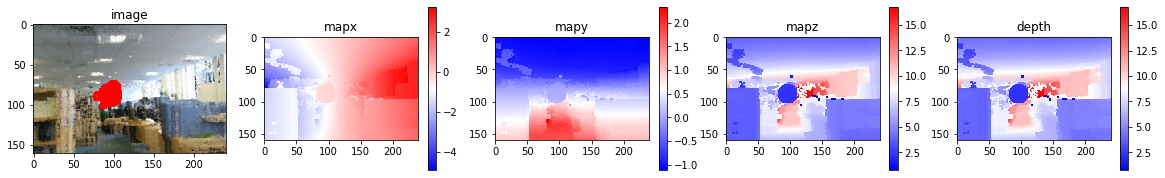


Prediction percentage: 1.0 

Middle pixel Depth: 2.3377300461956123
Middle 4:
[[2.34505627 2.33846136]
 [2.34416108 2.33773005]]
Middle 8:
[[2.3535933  2.34602651 2.34018818 2.33494503]
 [2.35251468 2.34505627 2.33846136 2.33351922]
 [2.351512   2.34416108 2.33773005 2.33282271]
 [2.351512   2.34416108 2.33773005 2.33282271]]


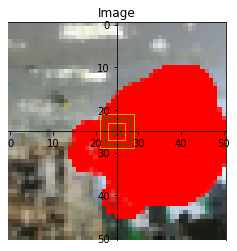

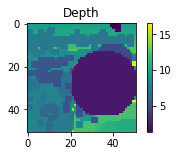

########################################

[[60.         60.          1.          2.34505627]]
I am at position [0, 0, 0]
I have found 0 out of 11 spheres!

I am now at position [-0.26, 0.05, 2.33]
I have found 1 out of 11 spheres!

Wall time: 10.2 s


In [10]:
%%time
# Visualise world before we move
visualise_maps(image, mapx, mapy, mapz, depth)

# Attemp to find spheres
res = sliding_window_classifier(20, image)  # Return list of x,y,predict,depth
print(res)

# Get x,y of sphere with minimum depth aka closest sphere
min_index = np.argmin(res[:,3]) #npres [:,3] is list of depths. argmin is index of min depth
x = int(res[min_index, 0])    # From float to int
y = int(res[min_index, 1])    

global_cloud, spheres_collected, position = sphere_position(x, y, position, spheres_collected)    # Get spacial coordinates of new sphere
# and move there apparantly

In [11]:
%%time
# Get new images
image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, angle, position)

Wall time: 1min 30s


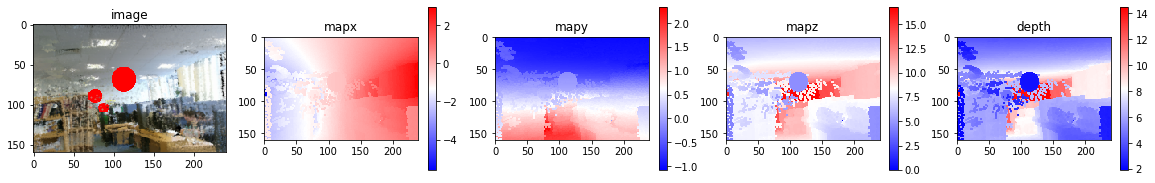


Prediction percentage: 1.0 

Middle pixel Depth: 2.354586360735478
Middle 4:
[[2.35941522 2.35624936]
 [2.35836008 2.35458636]]
Middle 8:
[[2.36714435 2.36225363 2.35796079 2.35497319]
 [2.36396422 2.35941522 2.35624936 2.35284779]
 [2.36274517 2.35836008 2.35458636 2.35147811]
 [2.361582   2.35730636 2.35366618 2.35068689]]


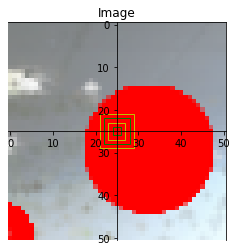

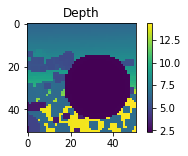

########################################

Prediction percentage: 0.9291167855262756 

Middle pixel Depth: 5.939629117650886
Middle 4:
[[6.42574078 6.42574078]
 [5.93962912 5.93962912]]
Middle 8:
[[2.85408405 6.49338532 6.50910785 6.50910785]
 [6.49338532 6.42574078 6.42574078 4.94619347]
 [2.85275289 5.93962912 5.93962912 4.94619347]
 [2.85275289 5.93962912 5.93962912 4.94619347]]


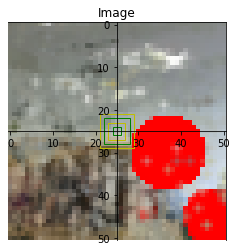

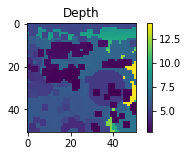

########################################

Prediction percentage: 0.9999994039535522 

Middle pixel Depth: 2.8572717191558294
Middle 4:
[[7.11456261 7.1136339 ]
 [2.85727172 2.85727172]]
Middle 8:
[[2.96882736 2.96882736 7.1136339  7.1136339 ]
 [7.12028036 7.11456261 7.1136339  7.1136339 ]
 [7.12028036 2.85727172 2.85727172 2.85727172]
 [7.12183191 2.85727172 2.85727172 2.85727172]]


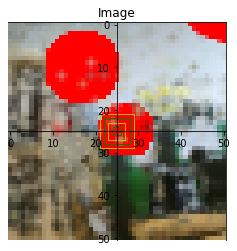

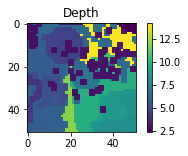

########################################

[[80.         40.          1.          2.35941522]
 [60.         80.          0.9999994   7.11456261]]
I am at position [-0.26, 0.05, 2.33]
I have found 1 out of 11 spheres!

I am now at position [-1.34, 0.52, 8.06]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [12]:
%%time
# Visualise world before we move
visualise_maps(image, mapx, mapy, mapz, depth)

# Attemp to find spheres
res = sliding_window_classifier(20, image)  # Return list of x,y,predict,depth
print(res)

# Get x,y of sphere with minimum depth aka closest sphere
min_index = np.argmin(res[:,3]) #npres [:,3] is list of depths. argmin is index of min depth
x = int(res[min_index, 0])    # From float to int
y = int(res[min_index, 1])    

global_cloud, spheres_collected, position = sphere_position(x, y, position, spheres_collected)    # Get spacial coordinates of new sphere
# and move there apparantly

In [0]:
# Move to next sphere and update
spheres_collected

In [0]:
#

In [0]:
#

In [0]:
#

In [0]:
#
#

In [0]:
#

In [0]:
#